# Life Expectancy

_What is life expectancy and how is it interpreted?_

The term "life expectancy" refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die.

Life expectancy is a statistical measure of the average time an organism is expected to live, based on the year of its birth, its current age and other demographic factors including gender. The most commonly used measure of life expectancy is at birth, which can be defined in two ways. Wikipedia

Taking the Life expectancy as a scenario, let us first do some analysis. life expectancy has increased substantially around the world in the last couple of centuries. As a matter of fact, the data tells us that in the long run life expectancy has increased in all countries around the world. 

During the analysis I found that the _life expectancy_ is dependenct of the income and or _Development status_ of the Country or region the peopple are living. From the analysis I found out that the life expectancy(Life_expectancy) of a country is increasing in a steady pace every year (Year). This is also affected by growth status_(Development_Status = Least developed countries / Less developed regions / More developed regions)_ of the country. Life_expetancy is different for a _male_ and a _female_.

So Let us use the below 5 different variables for our analysis.

1. Year 
2. Development_status
3. Men
4. Women
5. Life_Expectancy

The Below the algorithm I created based the analysis and the data that I could find online. This Data we can use to analyse different patterns and dependencies.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from scipy.stats import chi2_contingency
from scipy.stats import chi2

from numpy import std

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import seaborn as sns

%matplotlib inline

# Setting up variables for data frame creation. Getting the Mean and standard deviation values from the analysis 
# of data from the web
m_mu_Least, m_sigma1_Least = 47.41360606, 7.930890669
m_mu_Less, m_sigma1_Less = 55.86471212, 8.578650548
m_mu_More, m_sigma1_More = 69.00424242, 3.55633242

w_mu_Least, w_sigma1_Least = 50.01122727, 8.106858052
w_mu_Less, w_sigma1_Less = 58.76340909, 9.210212953
w_mu_More, w_sigma1_More = 75.81390909, 4.078394845


mylist = ['Least developed countries','Less developed regions','More developed regions']


# Year values... for the population.
Years = np.arange(1950, 2016, 1)

#Creating the Data structures
raw_data_Least = {'Year': Years,
                'Development_status' : 'Least developed countries',
                'Women': np.sort(np.random.normal(w_mu_Least, w_sigma1_Least, len(Years))),
                'Men': np.sort(np.random.normal(m_mu_Least, m_sigma1_Least, len(Years)))}

raw_data_More = {'Year': Years,
                'Development_status' : 'More developed regions',
                'Men': np.sort(np.random.normal(m_mu_More, m_sigma1_More, len(Years))),
                'Women': np.sort(np.random.normal(w_mu_More, w_sigma1_More, len(Years)))}

raw_data = {'Year': Years,
                'Development_status' : "Less developed regions",
                'Men': np.sort(np.random.normal(m_mu_Less, m_sigma1_Less, len(Years))),
                'Women': np.sort(np.random.normal(w_mu_Less, w_sigma1_Less, len(Years)))}

#Creating set of data Frame
df = pd.DataFrame(raw_data_Least)

#Creating Secondary Data Frame
df_Less = pd.DataFrame(raw_data)
df_More = pd.DataFrame(raw_data_More)

#Appending the data to the Dataframe
df = df.append(df_Less,ignore_index=True )
df = df.append(df_More,ignore_index=True)

# creating a calculated field - Life Expectancy which is the mean of life expectancy of Men and Women

df['Life_Expectancy'] = (df.Men + df.Women)/2

# Data cleaning, Making all the Development Status same 

df.loc[df['Development_status'] == "Least developed countries", 'Development_status'] = "Least developed regions"

#Creating an index on Development Status

df = df.set_index('Development_status')

df.head(10)

,Men,Women,Year,Life_Expectancy
Development_status,,,,
Least developed regions,30.045896,29.185104,1950,29.615500
Least developed regions,30.450478,32.133220,1951,31.291849
Least developed regions,32.028073,32.262404,1952,32.145238
Least developed regions,33.644462,32.997214,1953,33.320838
Least developed regions,33.878174,33.357328,1954,33.617751
Least developed regions,34.354819,36.787104,1955,35.570961
Least developed regions,34.446826,40.022847,1956,37.234837
Least developed regions,34.882287,40.531896,1957,37.707091
Least developed regions,36.957299,41.347455,1958,39.152377


In [133]:
df.describe()

,Men,Women,Year,Life_Expectancy
count,198.000000,198.000000,198.000000,198.000000
mean,57.456971,61.261014,1982.500000,59.358993
std,11.109277,13.447731,19.098662,12.214215
min,29.092432,26.728194,1950.000000,30.449637
25%,47.645833,51.112492,1966.000000,49.662897
50%,58.863862,60.062444,1982.500000,59.709296
75%,66.480445,74.337968,1999.000000,70.482665
max,75.444906,86.418986,2015.000000,80.931946


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288C005B0F0>,
      dtype=object)

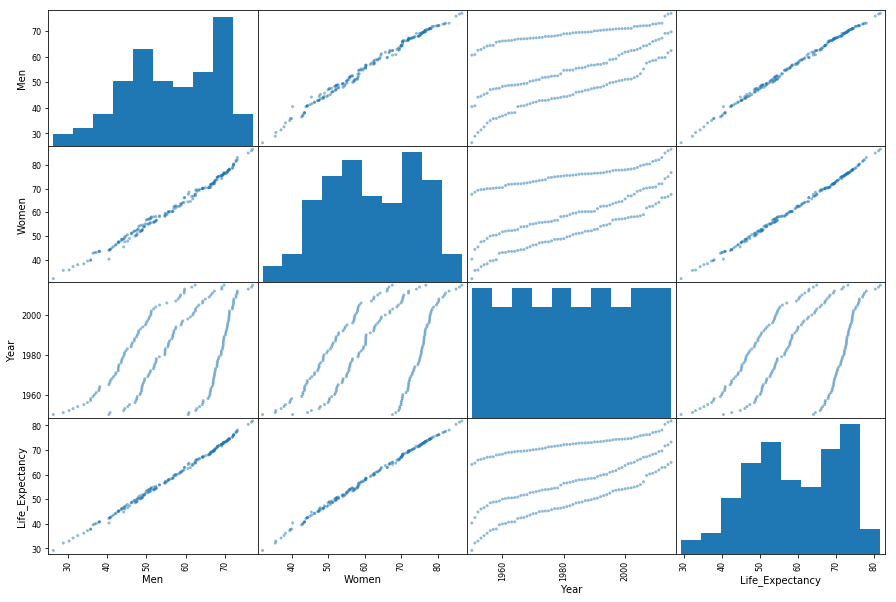

In [5]:
#Scatter plot of the full data gives a view.
scatter_matrix(df,figsize = (15, 10))

Men                   AxesSubplot(0.125,0.125;0.133621x0.755)
Women              AxesSubplot(0.285345,0.125;0.133621x0.755)
Year                AxesSubplot(0.44569,0.125;0.133621x0.755)
Life_Expectancy    AxesSubplot(0.606034,0.125;0.133621x0.755)
dtype: object

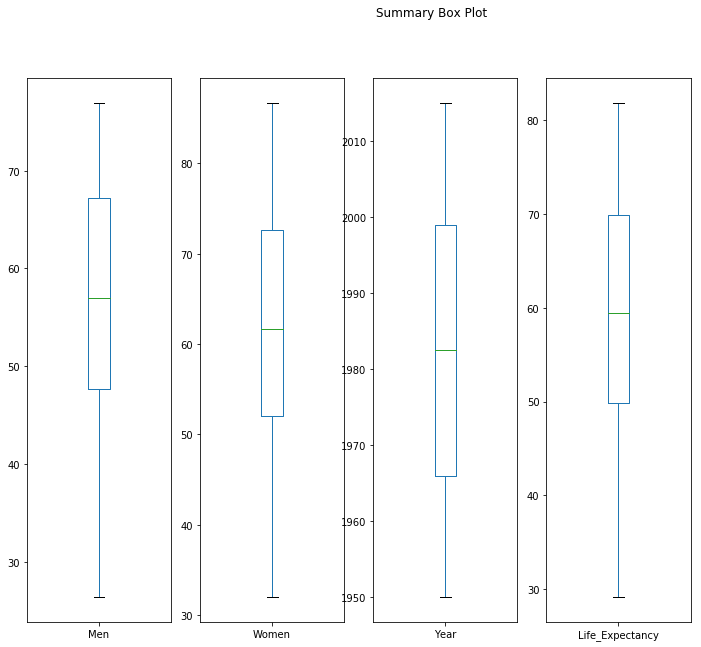

In [6]:
# Box plot shows the information in a better readable format and shows us the different statical pointers.
plt.figure(figsize = (15, 10))

df.plot(kind='box', subplots = True, layout = (1,5), sharex = False, sharey = False, title='Summary Box Plot',figsize = (15, 10)) 

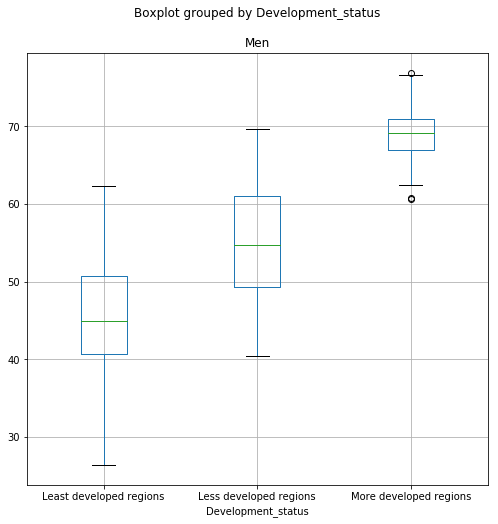

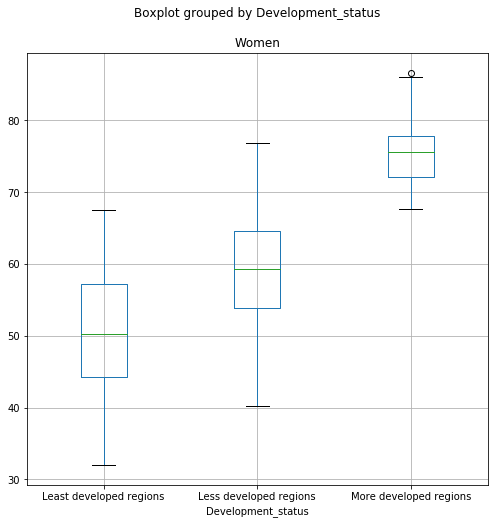

In [7]:
# Boxplot showing the differences between the Life expectancy of Men and Women's by there status of the regions they live in.
figsize = (15, 10)
df.boxplot(column='Men', by='Development_status', figsize = (8, 8))
df.boxplot(column='Women', by='Development_status', figsize = (8, 8))


Text(0,0.5,'Life_expectancy')

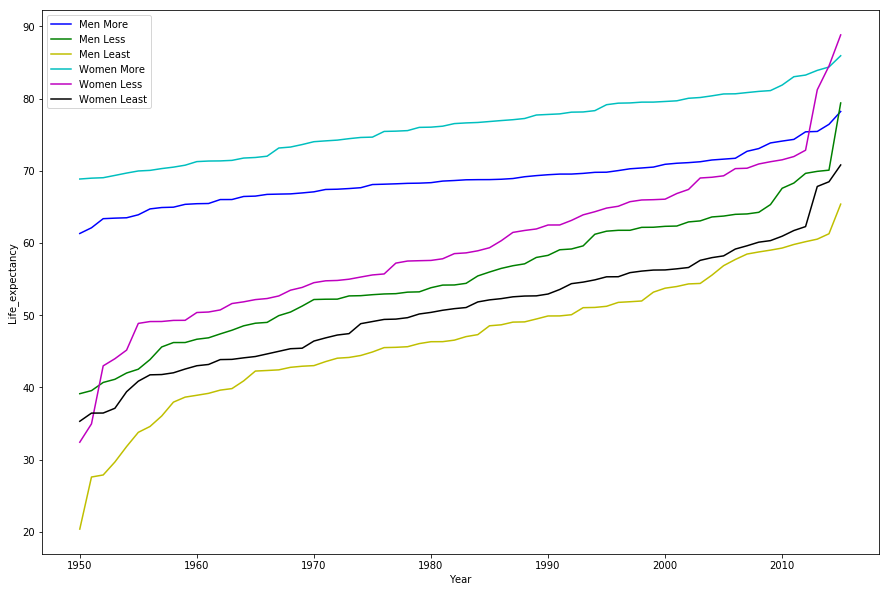

In [55]:
#Graph showing the trending of the Ages between Men and Women depending on the Development Status of the coutry or region.

c_More = df.loc['More developed regions']
c_Less = df.loc['Less developed regions']
c_Least = df.loc['Least developed regions']

plt.figure(figsize = (15, 10))

#Plot with differently-coloured markers.
plt.plot(c_More.Year, c_More.Men, 'b-', label='Men More')
plt.plot(c_Less.Year, c_Less.Men, 'g-', label='Men Less')
plt.plot(c_Least.Year, c_Least.Men,'y-', label='Men Least')

plt.plot(c_More.Year, c_More.Women, 'c-', label='Women More')
plt.plot(c_Less.Year, c_Less.Women, 'm-', label='Women Less')
plt.plot(c_Least.Year, c_Least.Women,'k-', label='Women Least')

#Create legend
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Life_expectancy')


In [10]:
c_More.head()

,Men,Women,Year,Life_Expectancy
Development_status,,,,
More developed regions,60.606284,67.643334,1950,64.124809
More developed regions,60.770769,68.542651,1951,64.656710
More developed regions,62.477592,69.327006,1952,65.902299
More developed regions,62.793899,69.612561,1953,66.203230
More developed regions,63.471861,69.659815,1954,66.565838


In [11]:
c_More.describe()

,Men,Women,Year,Life_Expectancy
count,66.000000,66.000000,66.000000,66.000000
mean,68.840476,75.554536,1982.500000,72.197506
std,3.346122,4.270352,19.196354,3.786443
min,60.606284,67.643334,1950.000000,64.124809
25%,66.927689,72.120525,1966.250000,69.524107
50%,69.147882,75.658873,1982.500000,72.403378
75%,70.909486,77.860145,1998.750000,74.384815
max,76.918983,86.675825,2015.000000,81.797404


In [12]:
c_Less.describe()

,Men,Women,Year,Life_Expectancy
count,66.000000,66.000000,66.000000,66.000000
mean,55.166783,59.408509,1982.500000,57.287646
std,7.234993,8.111610,19.196354,7.665318
min,40.472958,40.227080,1950.000000,40.350019
25%,49.296682,53.856149,1966.250000,51.576415
50%,54.745381,59.330795,1982.500000,57.038088
75%,60.985172,64.547551,1998.750000,62.766362
max,69.701436,76.802114,2015.000000,73.251775


In [210]:
c_Least.describe()

,Men,Women,Year,Life_Expectancy
count,66.000000,66.000000,66.000000,66.000000
mean,45.623406,51.799955,1982.500000,48.711680
std,8.470726,7.718359,19.196354,8.068228
min,24.036654,28.059362,1950.000000,26.048008
25%,39.891764,48.034646,1966.250000,43.963205
50%,46.544933,51.849809,1982.500000,49.197371
75%,50.716688,57.175599,1998.750000,53.946144
max,64.926819,69.814267,2015.000000,67.370543


## Distribution

Now Let us discuss about the distribution. Probability distributions is one of many statistical techniques that can be used to analyze data to find useful patterns. You use a probability distribution to compute the probabilities associated with the elements of a dataset:

### Normal Distribution

Normal distribution is a form presenting data by arranging the probability distribution of each value in the data. Most values remain around the mean value making the arrangement symmetric.

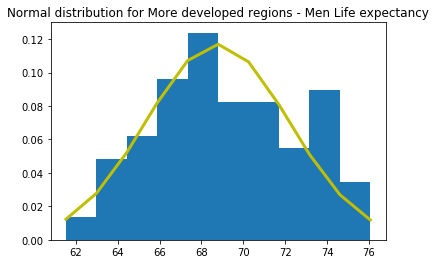

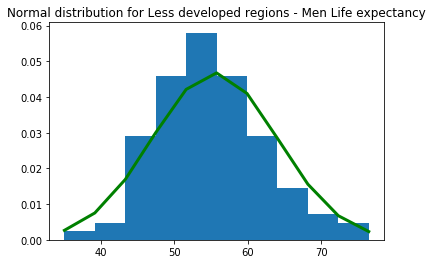

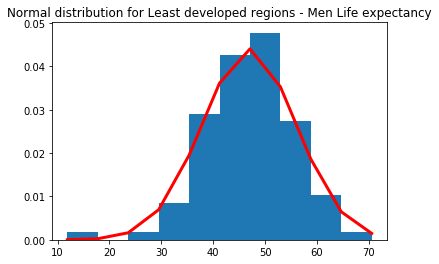

In [147]:
#Plotting the normal distribution for Life expectancy More developed regions - Men.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_More.Men.mean(), c_More.Men.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.title('Normal distribution for More developed regions - Men Life expectancy')
plt.show()


#Plotting the normal distribution for Life expectancy Less developed regions.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_Less.Men.mean(), c_Less.Men.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='g')
plt.title('Normal distribution for Less developed regions - Men Life expectancy')
plt.show()

#Plotting the normal distribution for Life expectancy Least developed regions.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_Least.Men.mean(), c_Least.Men.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='r')
plt.title('Normal distribution for Least developed regions - Men Life expectancy')
plt.show()

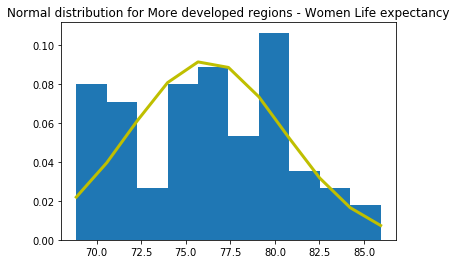

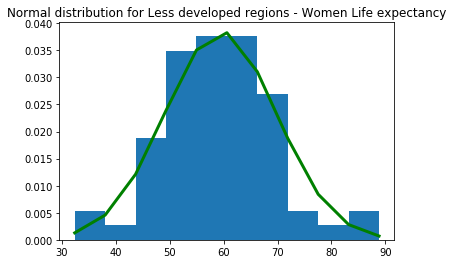

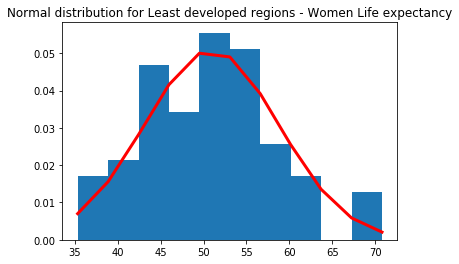

In [146]:
#Plotting the normal distribution for Life expectancy More developed regions - Women.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_More.Women.mean(), c_More.Women.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(c_More.Women, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.title('Normal distribution for More developed regions - Women Life expectancy')
plt.show()


#Plotting the normal distribution for Life expectancy Less developed regions.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_Less.Women.mean(), c_Less.Women.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(c_Less.Women, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='g')
plt.title('Normal distribution for Less developed regions - Women Life expectancy')
plt.show()

#Plotting the normal distribution for Life expectancy Least developed regions.
#calculate the Value of mean and Sigma(Standard deviation)
mu, sigma = c_Least.Women.mean(), c_Least.Women.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(c_Least.Women, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='r')
plt.title('Normal distribution for Least developed regions - Women Life expectancy')
plt.show()

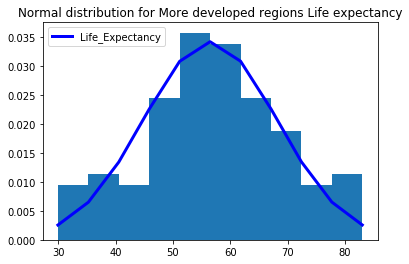

In [16]:
mu, sigma = df.Men.mean(), df.Men.std()
s = np.random.normal(mu, sigma, 100)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 10, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='b',label='Life_Expectancy')

plt.title('Normal distribution for More developed regions Life expectancy')
plt.legend(loc='upper left')

plt.show()

## Data Relationships

### t-Test for Independent samples.

The independent samples(or two-sample) t-test is used to compare the mean values of continuous-level(interval or ratio data), normally distributed data. The independent sample t-test compares two means. It assumes a model where the variables in the analysis are split into independent and dependent varaiables. The model assumes that a difference in the mean score of the dependent variable is found because of the influence of the independent variable. Thus, the independent sample t-test is an analysis of dependence. 

#### 1. Comparison between Men and Women by Development Status.

We use the critical value to interpret the t statistics to see if the finding of the test is significant and that indeed the means are different as we expected. The function also returns a p-value. We interpret the p-value using an alpha, such as 0.05 to determine if the findings of the test is significant and that indeed the means are different as we expected.

From the result, there is sufficient evidence to reject the null hypothesis, finding that the sample means are likely different.

In [17]:
# function for calculating the t-test for two independent samples
#Comparison between Men and Women

# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)

	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)  
    
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	dof = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, dof)  
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), dof)) * 2.0
	# return everything
	return t_stat, dof, cv, p

# generate two independent samples
data1 = c_More.loc[:,'Men']
data2 = c_More.loc[:,'Women']


# calculate the t test
alpha = 0.05
t_stat, dof, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, dof=%d, cv=%.3f, p=%.3f' % (abs(t_stat), dof, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis.')
else:
	print('Reject the null hypothesis.')
    
# interpret via p-value
if p <= alpha:
	print('Reject the null hypothesis.')
else:
	print('Accept null hypothesis.')

t=10.054, dof=130, cv=1.657, p=0.000
Reject the null hypothesis.
Reject the null hypothesis.


### t-Test for Dependent Samples

In this case we collect some observations on a sample from the life expectancy data, then apply some treatment and then collect observations from the same sample.

The result is two samples of the same size where the observations in each sample are related or paired. So, here we are taking male and female life expectancy data.


In [28]:
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
#	print(data1)   

	# number of paired samples
	n = len(data1)
	print(n) 
    
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
	print(d1)    
    
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
	print(d2)    
    
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
    
	# standard error of the difference between the means
	sed = sd / sqrt(n)
    
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
    
	# degrees of freedom
	dof = n - 1
    
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, dof)
    
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), dof)) * 2.0
    
	# return everything
	return t_stat, dof, cv, p
 

# generate two independent samples
data1 = np.array(c_More.loc[:,'Men'])
data2 = np.array(c_More.loc[:,'Women'])


# calculate the t test
alpha = 0.05
t_stat, dof, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, dof=%d, cv=%.3f, p=%.3f' % (t_stat, dof, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

66
3073.745771809637
-443.1279570208726
t=-44.296, dof=65, cv=1.669, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


### Chi Square test

The Chi-Square test of independence ia a statistical test to determine if there is a significant relationship between 2 categorical variables. In simple words, the Chi-Square statistic will test whether there is a significant differenece in the observed vs the expected frequencies of both variables.

Interpreting the test statistics in the context of the chi-squared distribution with the requisite number of degrees of freedom as follows:

#### If Statistics >= Critical Value: Significant result, Reject null hypothesis(H0), dependent.
#### If Statistics < Critical Valaue: not significant result, Fail to reject null hypothesis(H0), independent.

In terms of a p-value and a chosen significance level(alpha), the test ca be interpreted as follows:

#### If p-value <= apha: significant result, reject null hypothesis(H0), dpenedent.
#### If p-value > alpha: not significant result, fail to reject null hypothesis(H0), indpendent.

Chi-Squared test for independence can be calculated in Python using the chi2_contigency() SciPy function.

A probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent. If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.

Interpreting the p-value by comparing it to a chosen significance level, which would be 5%, calculated by inverting the 95% probablity used in the critical value interpretation.


In [131]:
#Chi-Square test with similar proportions
#Comparion between Life expectancy of Men and Women.

data1 = np.array(c_More.loc[:,'Men'])
data2 = np.array(c_More.loc[:,'Women'])

t = [data1,data2]


stat,p,dof,expected = chi2_contingency(t)
print('dof=%d' %dof)

#interpret test-statistics
prob = 0.05
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' %(prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent(reject H0)')
else:
    print('Independent(fail to reject H0)')
    
#interpret p-value
alpha = 1.0 -prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent(reject H0)')
else:
    print('Independent(fail to reject H0)')


dof=65
probability=0.050, critical=47.450, stat=0.438
Independent(fail to reject H0)
significance=0.950, p=1.000
Independent(fail to reject H0)


C:\Users\ashok_p_g\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 100)

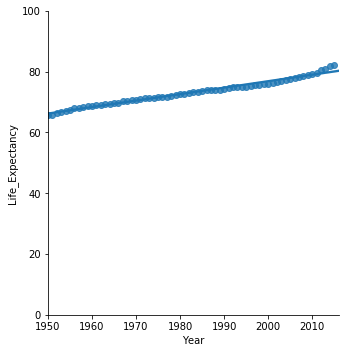

In [16]:
import seaborn as sns
sns.lmplot(x="Year", y="Life_Expectancy",  data=c_More)
# control x and y limits
plt.xlim(1950, 2016)
plt.ylim(0,100)
#sns.plt.show()

## Correlation
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

From the calculations, thanks to Pandas, we have a method call corr() which we can use to find the correlation between data frame columns. We can clearly see the correlation between Men's and Women's ages, we can clearly see that the if the Men's age increases, we see that the women's age is increasing as well. This will directly increase the Life expectancy of the Region.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables'values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

#### Positive Correlation: both varaiables change in the same direction.
#### Neutral Correlation: No relationship in the chnage of the variables.
#### Negative Correlation: Variables changes in opposite directions.

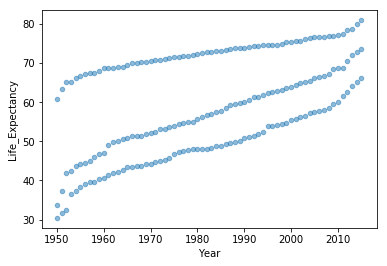

In [150]:
#Correlation of life expectancy for the countries as per year
df.plot(kind="scatter", y="Life_Expectancy", x="Year", alpha=0.5)
plt.savefig('scatter.png')

From the above scattered plot, the correlation is indeed very strong, as we can see clearly the upward trend and that the points are not too dispersed.

In [56]:
c_More.corr()

,Men,Women,Year,Life_Expectancy
Men,1.000000,0.976722,0.962609,0.992692
Women,0.976722,1.000000,0.992026,0.995470
Year,0.962609,0.992026,1.000000,0.984729
Life_Expectancy,0.992692,0.995470,0.984729,1.000000


In [326]:
# Getting Coefficient
r, p = np.corrcoef(df.Women, df.Men)

print(r)

print(p)

[1.         0.98815794]
[0.98815794 1.        ]


In [306]:
# Correlation between Men and overall Life Expectancy
df['Life_Expectancy'].corr(df['Men'])

0.9964068761090739

## More Developed Region

data1: mean=72.481 stdv=3.820
data2: mean=1982.500 stdv=19.050


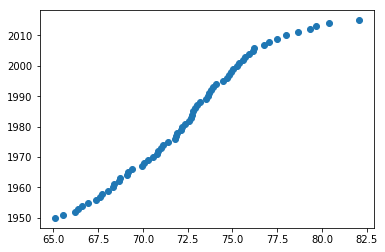

In [152]:
#Average Life expectancy of More Developed Region
#prepare data
data1 = c_More.loc[:,'Life_Expectancy']
data2 = c_More.loc[:,'Year']

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

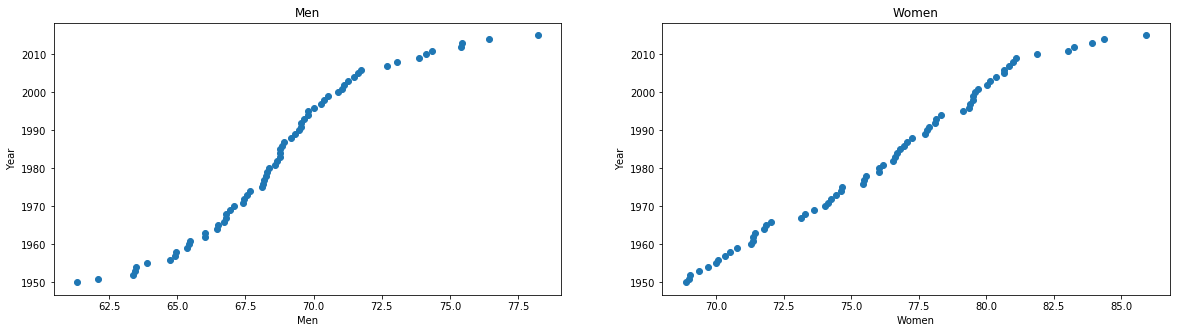

In [164]:
#Graph showing Male and female life expectancy in More Developed Region.
#As the graph clearly shows the female life expectancy is more compared to male life expectancy.
plt.figure(figsize=(20, 5))

features = ['Men', 'Women']
target = c_More['Year']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = c_More[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Year')

## Less Developed Region

data1: mean=57.492 stdv=9.330
data2: mean=1982.500 stdv=19.050


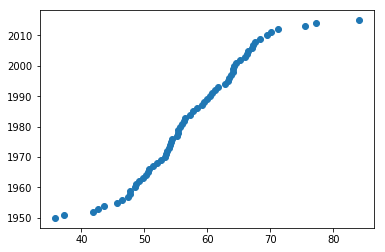

In [155]:
#Average Life expectancy of Less Developed Region
#prepare data
data1 = c_Less.loc[:,'Life_Expectancy']
data2 = c_Less.loc[:,'Year']

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

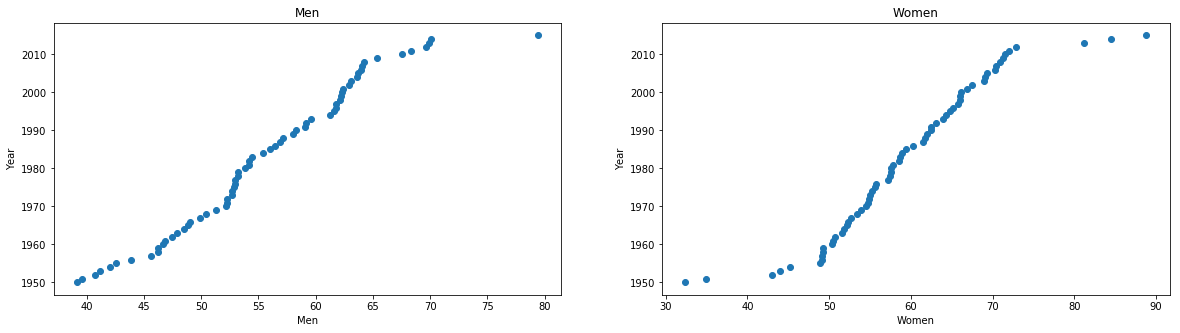

In [156]:
#Graph showing Male and female life expectancy in Less Developed Region.
#As the graph clearly shows the female life expectancy is more compared to male life expectancy.
plt.figure(figsize=(20, 5))

features = ['Men', 'Women']
target = c_Less['Year']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = c_Less[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Year')

## Least Developed Region

data1: mean=48.923 stdv=8.340
data2: mean=1982.500 stdv=19.050


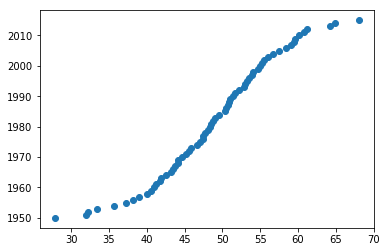

In [157]:
#Average Life expectancy of Least Developed Region
#prepare data
data1 = c_Least.loc[:,'Life_Expectancy']
data2 = c_Least.loc[:,'Year']

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

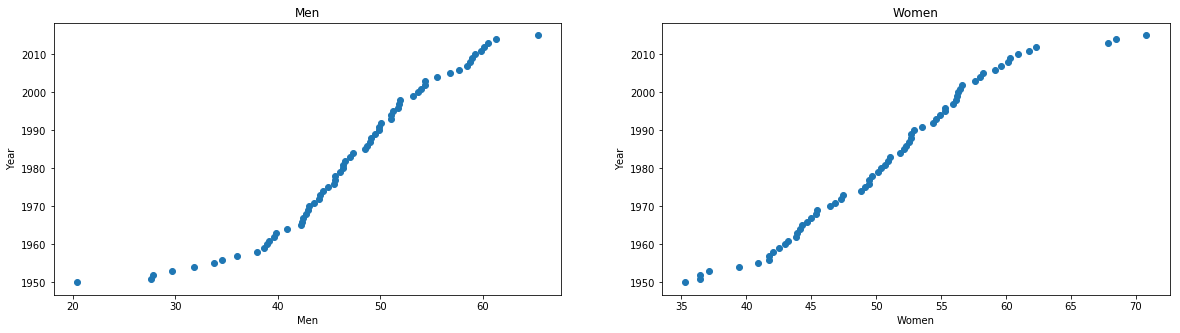

In [165]:
#Graph showing Male and female life expectancy in Least Developed Region.
#As the graph clearly shows the female life expectancy is more compared to male life expectancy.
plt.figure(figsize=(20, 5))

features = ['Men', 'Women']
target = c_Least['Year']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = c_Least[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Year')

As from the above scatter plot of the two variables (male and female life expectancy), we know that there is a relationship between the two variables. This is clear when we review the generated scatter plot where we can see an increasing trend.


The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

The Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

 Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

In [48]:
#Method: 1 Spearmans correlation(More Developed male and female life expectancy)
# prepare data
data1 = c_More.loc[:,'Men']
data2 = c_More.loc[:,'Women']
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 1.000


In [45]:
#Method: 2 Spearmans correlation(More Developed male and female life expectancy)
c_More.drop(['Year'],axis=1).corr(method='spearman')

,Men,Women,Life_Expectancy
Men,1.0,1.0,1.0
Women,1.0,1.0,1.0
Life_Expectancy,1.0,1.0,1.0


The above result shows,that the data is Gaussian and that the relationship between the variables(male and female life expectancy) is linear. Nevertheless, the nonparametric rank-based approach shows a strong correlation between the variables of 1. 

#### Pearson correlation coefficient (named for Karl Pearson)
can be used to summarize the strength of the linear relationship between two data samples.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation


In [52]:
#Method 1: Pearsons correlation
c_More.drop(['Year'], axis=1).corr(method='pearson')

,Men,Women,Life_Expectancy
Men,1.000000,0.976833,0.992692
Women,0.976833,1.000000,0.995519
Life_Expectancy,0.992692,0.995519,1.000000


In [58]:
# Method 2: prepare data: male and female life expectancy 
data1 = c_More.loc[:,'Men']
data2 = c_More.loc[:,'Women']
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.977


From the above calculation we can see that, the two variables(male and female life expectancy) are positively correlated and that the correlation is 0.977. This suggest a hihg level of correlation, ie the vale is above 0.5 and close to 1.0.

### "corr()" method evalutes the correlation between all the features, graphed with a color coding.

When there is no correlation between 2 variables (ie, correlation is 0 or near 0), the colour is grey.The darkest red means there is a perfect positive correlation, while the darkest blue means there is a negative correlation.

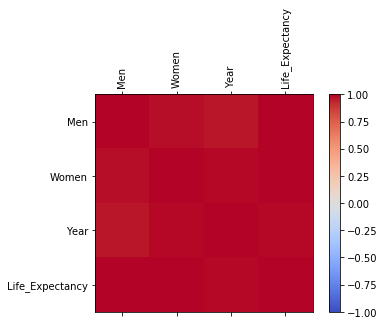

In [62]:
corr = c_More.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(c_More.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(c_More.columns)
ax.set_yticklabels(c_More.columns)
plt.show()

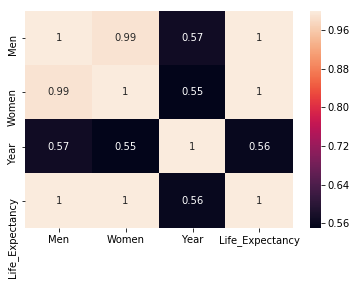

In [65]:
#correlation matrix for the All Regions
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

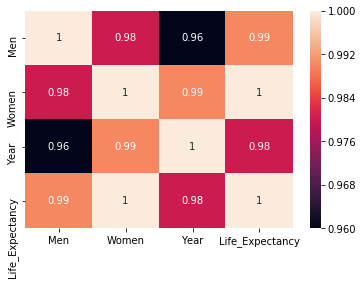

In [67]:
#Correlation matrix for More Developed Region
correlation_matrix = c_More.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

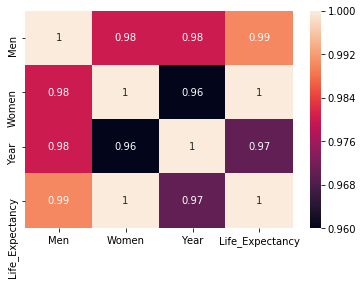

In [68]:
#Correlation matrix for Less Developed Region
correlation_matrix = c_Less.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Linear Regression
The simplest kind of linear regression involes taking a set of data and trying to determine the "best" linear relationship. 

Here, I am considering Life expectancy(More Developed Regions) as dependent variable and the rest as independent variables. Which means I have to predict the life expectancy given the independent varaiables.


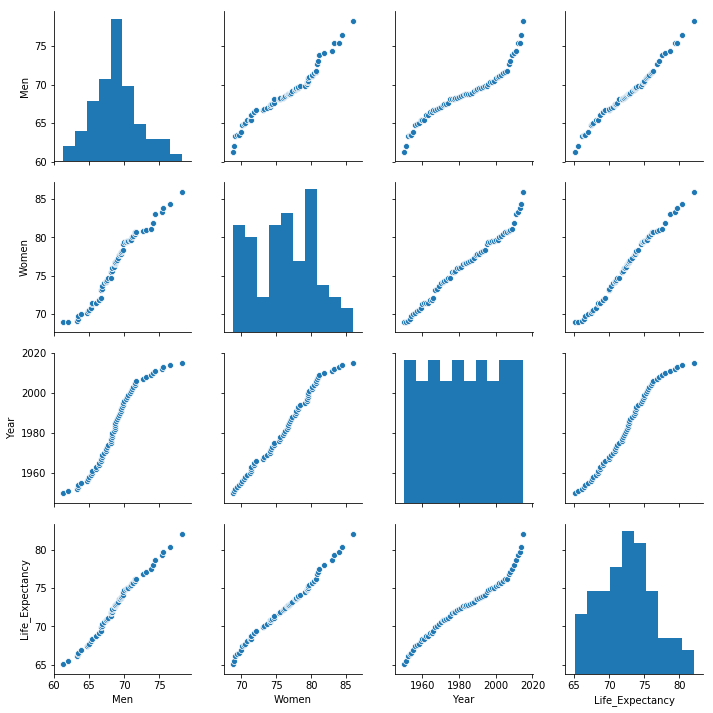

In [69]:
# creating graph for life expectancy of More Developed Regions
sns.pairplot(c_More)

Below shows the histogram, where we are exploring a single variable. A histogram divides the variables into bins, counts the data points in each bin, and shows the bin on the x-axis and the counts on the y-axis.

C:\Users\ashok_p_g\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


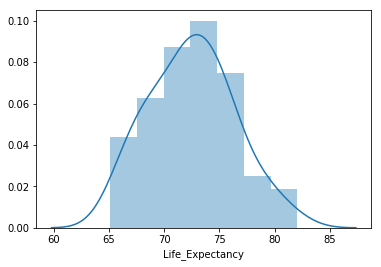

In [71]:
sns.distplot(c_More['Life_Expectancy'])

We will need to first split up our data into an X array that contains the features to train on and a Y array with the target variable, in this case the More Developed Regions life expectancy. 

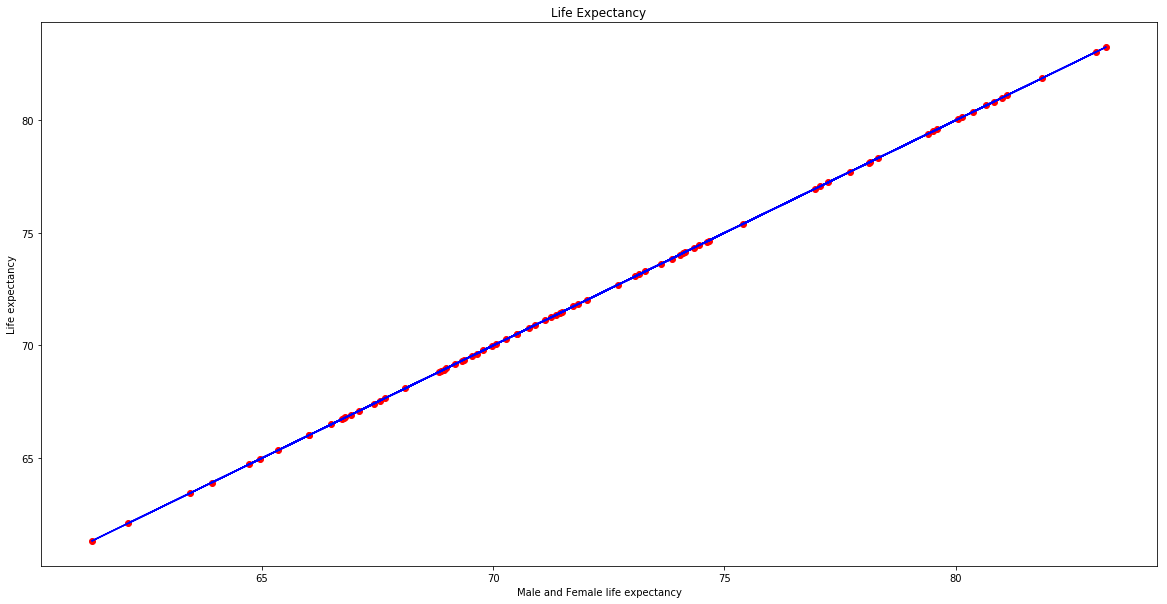

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = c_More[['Year','Men','Women']]
Y = c_More['Year']

X = c_More.iloc[:, :-2].values
y = c_More.iloc[:,:-2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(y_test)
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Life Expectancy')
plt.xlabel('Male and Female life expectancy')
plt.ylabel('Life expectancy')
plt.show()

#### Calculating the Linear regression between male and female life expectancy in More Developed Regions

In [120]:
#collecting x and y
X = c_More.loc[:,'Men'].values
Y = c_More.loc[:,'Women'].values

#Mean x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n = len(X)

#using formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x)*(Y[i]-mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1, b0)

1.2396356968615259 -9.052271934099252


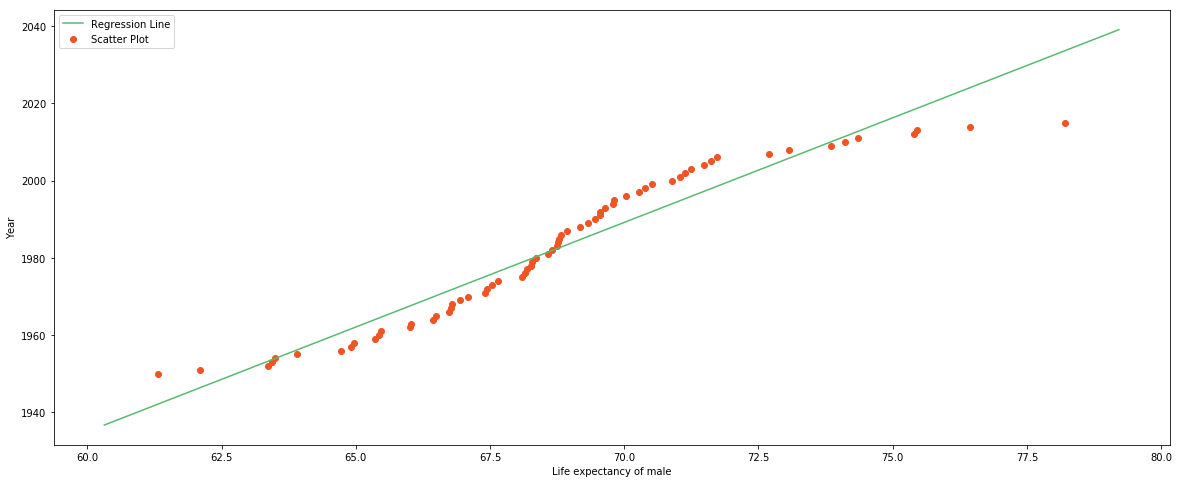

In [127]:
#collecting x and y
X = c_More.loc[:,'Men'].values
Y = c_More.loc[:,'Year'].values

#Mean x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n = len(X)

#using formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x)*(Y[i]-mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#Plotting values and regression line

max_x = np.max(X) + 1
min_x = np.min(X) - 1

#calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = b0 + b1 * x

#plotting line
plt.figure(figsize=(20, 8))
plt.plot(x, y, color='#58b970', label='Regression Line')
#Plotting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Life expectancy of male')
plt.ylabel('Year')
plt.legend()
plt.show()

In [125]:
#calculating the linear regression between Women life expectancy and Year.
#collecting x and y
X = c_More.loc[:,'Women'].values
Z = c_More.loc[:,'Year'].values

#Mean x and y
mean_x = np.mean(X)
mean_z = np.mean(Z)

#total number of values
n = len(X)

#using formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x)*(Z[i]-mean_z)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_z - (b1 * mean_x)

#print coefficients
print(b1, b0)

4.397223258312565 1647.457054377714


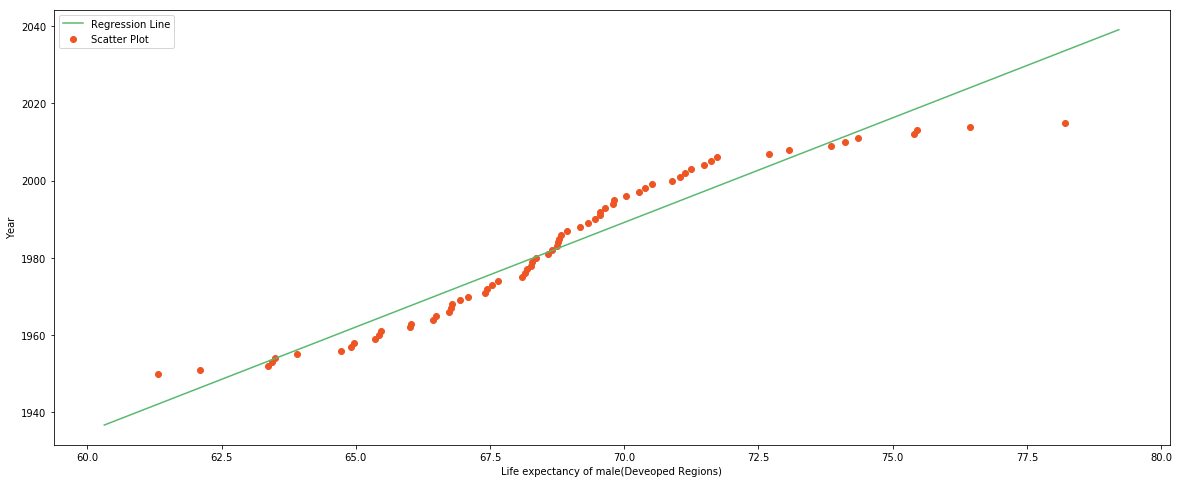

In [128]:
#Plotting values and regression line
max_x = np.max(X) + 1
min_x = np.min(X) - 1

#calculating line values x and y
x = np.linspace(min_x, max_x, 100)
z = b0 + b1 * x

#plotting line
plt.figure(figsize=(20, 8))
plt.plot(x, z, color='#58b970', label='Regression Line')
#Plotting scatter points
plt.scatter(X, Z, c='#ef5423', label='Scatter Plot')

plt.xlabel('Life expectancy of male(Deveoped Regions)')
plt.ylabel('Year')
plt.legend()
plt.show()

In [129]:
#calculating the linear regression between Women life expectancy and Year.
#collecting x and y
X = df.loc[:,'Women'].values
Z = df.loc[:,'Year'].values

#Mean x and y
mean_x = np.mean(X)
mean_z = np.mean(Z)

#total number of values
n = len(X)

#using formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x)*(Z[i]-mean_z)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_z - (b1 * mean_x)

#print coefficients
print(b1, b0)

0.7994047452265945 1932.9498850069392


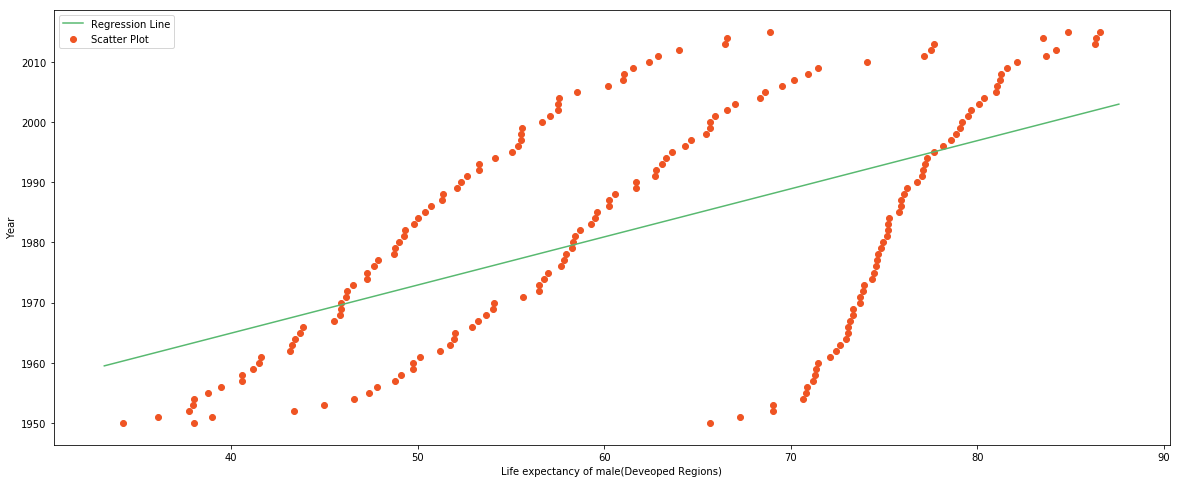

In [130]:
#Plotting values and regression line
max_x = np.max(X) + 1
min_x = np.min(X) - 1

#calculating line values x and y
x = np.linspace(min_x, max_x, 100)
z = b0 + b1 * x

#plotting line
plt.figure(figsize=(20, 8))
plt.plot(x, z, color='#58b970', label='Regression Line')
#Plotting scatter points
plt.scatter(X, Z, c='#ef5423', label='Scatter Plot')

plt.xlabel('Life expectancy of male(Deveoped Regions)')
plt.ylabel('Year')
plt.legend()
plt.show()

### Conclusion:
As from the above calculation we can see that developed Region has more life expectancy than the developing and under-developed countries/Regions. We have also seen that for all the regions, the female life expectancy is more when compared to male life expectency and also predicts that the life expectancy tends to increase every year.

In contrast to earlier periods, recent life expectancy growth in european countries appears to have been dependent on the economic growth. More rapid diffusion of knowledge and technology has lead to higher life expectancy in developed countries.

# Reference
1. https://ourworldindata.org/life-expectancy
2. https://stackoverflow.com/
3. https://erikrood.com/Python_References/
4. https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
5. https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
6. https://ourworldindata.org/ https://plot.ly/python/plot-data-from-csv/ 
7. http://onlinestatbook.com/2/logic_of_hypothesis_testing/steps.html 
8. https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/idea-of-significance-tests/v/simple-hypothesis-testing![image.png](attachment:image.png) 
9. https://www.kaggle.com/chrisbow/cleaning-data-with-python-challenge-day-1 
10. https://www.dataquest.io/blog/data-cleaning-with-python/  
11. http://www.statslab.cam.ac.uk/~rrw1/stats/Sa5.pdf![image.png](attachment:image.png)
12. https://researchbasics.education.uconn.edu/t-test/# 
13. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/![image.png](attachment:image.png) 
14. http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-1sample.html 
15. http://www.learningaboutelectronics.com/Articles/How-to-plot-a-graph-with-matplotlib-from-data-from-a-CSV-file-using-the-CSV-module-in-Python.php![image.png](attachment:image.png)
16. http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-paired.html![image.png](attachment:image.png) 
17. https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3 
18. https://pythonhealthcare.org/tag/linear_regression/ 
19. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-27-linear.html 
